In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

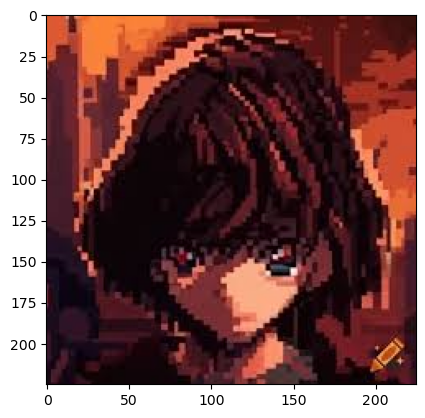

In [4]:
pic = cv2.imread("pixel_art.jpeg", cv2.IMREAD_COLOR)
pic_rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic_rgb)

Text(0.5, 1.0, 'Original')

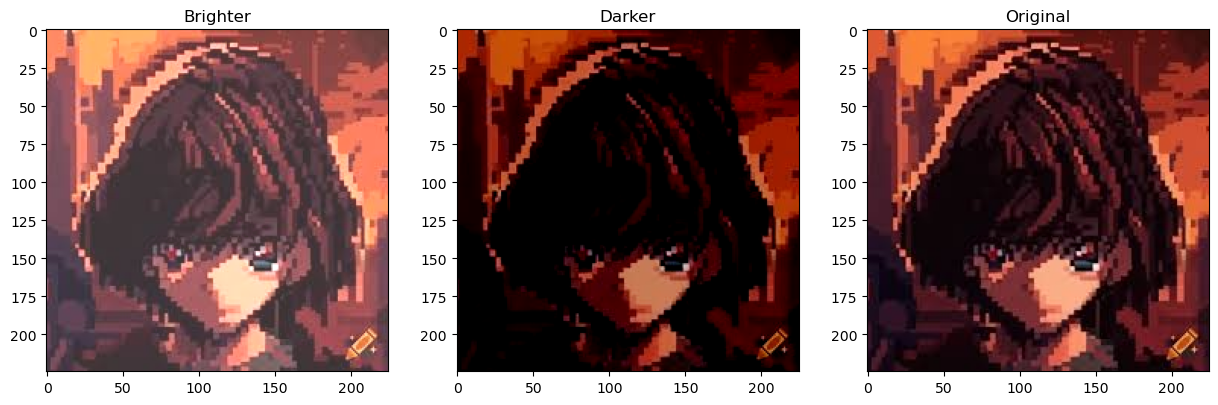

In [5]:
matrix = np.ones(pic_rgb.shape, dtype="uint8") * 50

pic_brighter = cv2.add(pic_rgb, matrix)
pic_darker = cv2.subtract(pic_rgb, matrix)

plt.figure(figsize=[15,5])
plt.subplot(131); plt.imshow(pic_brighter); plt.title("Brighter")
plt.subplot(132); plt.imshow(pic_darker); plt.title("Darker")
plt.subplot(133); plt.imshow(pic_rgb); plt.title("Original")

Text(0.5, 1.0, 'Original')

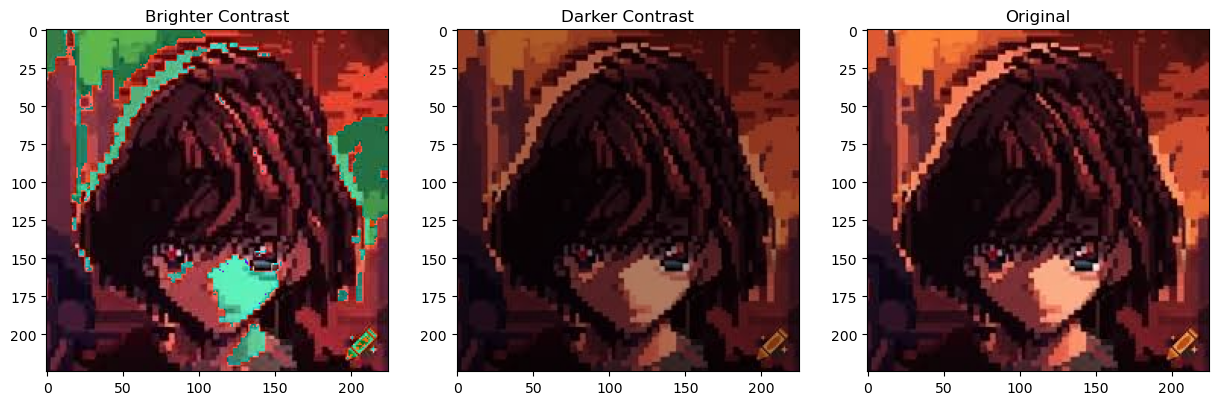

In [ ]:
# contrast == difference in the intensity values of pixels
m1 = np.ones(pic_rgb.shape) * 0.7
m2 = np.ones(pic_rgb.shape) * 1.4

pic_darker = np.uint8(cv2.multiply(np.float64(pic_rgb), m1))
pic_brighter = np.uint8(cv2.multiply(np.float64(pic_rgb), m2))

plt.figure(figsize=[15,5])
plt.subplot(131); plt.imshow(pic_brighter); plt.title("Brighter Contrast") # we get values > 255 , so we get overflow
plt.subplot(132); plt.imshow(pic_darker); plt.title("Darker Contrast")
plt.subplot(133); plt.imshow(pic_rgb); plt.title("Original")

Text(0.5, 1.0, 'Original')

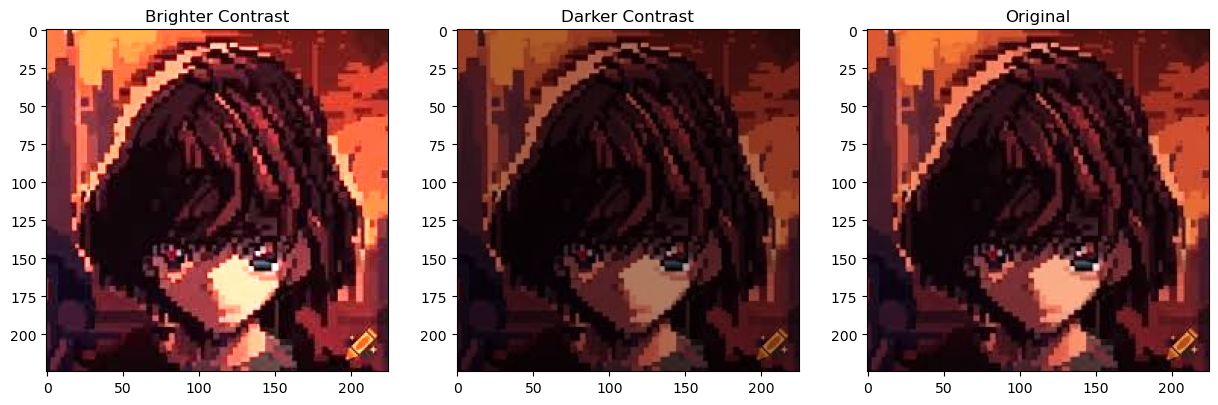

In [ ]:
m1 = np.ones(pic_rgb.shape) * 0.7
m2 = np.ones(pic_rgb.shape) * 1.4

pic_darker = np.uint8(cv2.multiply(np.float64(pic_rgb), m1))
pic_brighter = np.uint8(np.clip(cv2.multiply(np.float64(pic_rgb), m2),0,255))

plt.figure(figsize=[15,5])
plt.subplot(131); plt.imshow(pic_brighter); plt.title("Brighter Contrast")
plt.subplot(132); plt.imshow(pic_darker); plt.title("Darker Contrast")
plt.subplot(133); plt.imshow(pic_rgb); plt.title("Original")

Text(0.5, 1.0, 'Original')

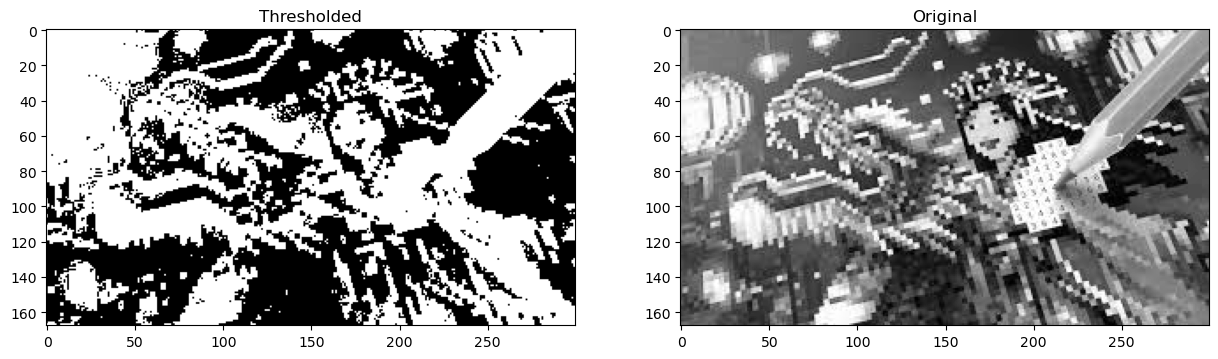

In [ ]:
# threshold ==> create binaru images from grayscale images

pic = cv2.imread("pixel_background.jpeg", cv2.IMREAD_GRAYSCALE)
retval, pic_thresh = cv2.threshold(pic, 100, 255, cv2.THRESH_BINARY) # 255 == max value

plt.figure(figsize=[15,5])
plt.subplot(121); plt.imshow(pic_thresh, cmap='gray'); plt.title("Thresholded")
plt.subplot(122); plt.imshow(pic, cmap='gray'); plt.title("Original")


Text(0.5, 1.0, 'Original')

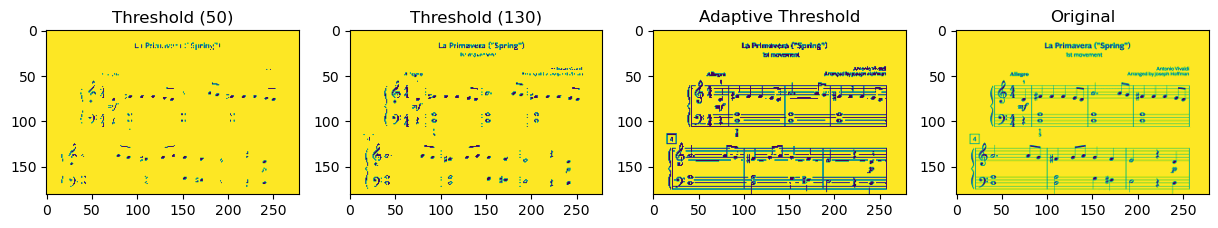

In [12]:
# threshold ==> useful for reading info out of images like optical , music sheets

img = cv2.imread("sheet_music.png", cv2.IMREAD_GRAYSCALE)
retval, img_th_1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
retval, img_th_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# adaptive threshold
img_th_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[15,5])
plt.subplot(141); plt.imshow(img_th_1); plt.title("Threshold (50)")
plt.subplot(142); plt.imshow(img_th_2); plt.title("Threshold (130)")
plt.subplot(143); plt.imshow(img_th_adp); plt.title("Adaptive Threshold")
plt.subplot(144); plt.imshow(img); plt.title("Original")

In [13]:
from PIL import Image
im = Image.open("square.webp").convert("RGB")
im.save("square.jpg", "jpeg")

im = Image.open("circle.webp").convert("RGB")
im.save("circle.jpg", "jpeg")

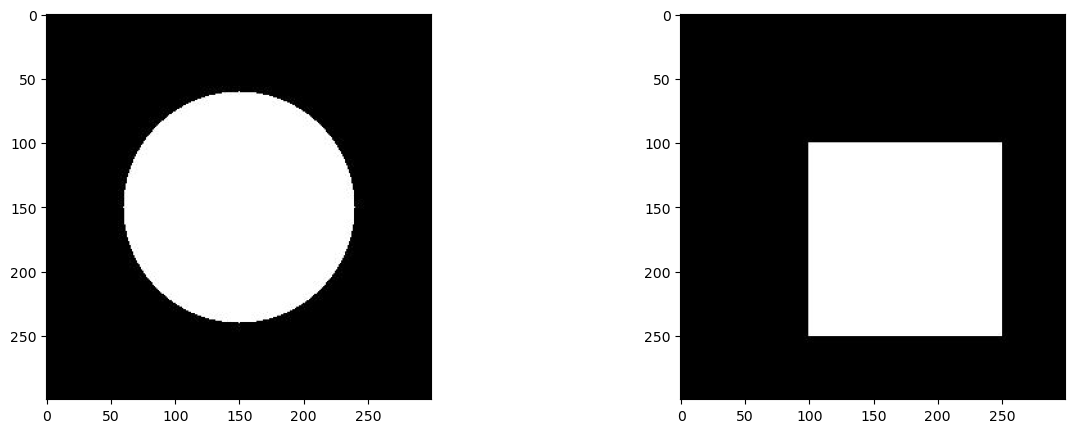

In [15]:
img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)
img_sq = cv2.imread("square.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[15,5])
plt.subplot(121); plt.imshow(img_cir, cmap='gray')
plt.subplot(122); plt.imshow(img_sq, cmap='gray')

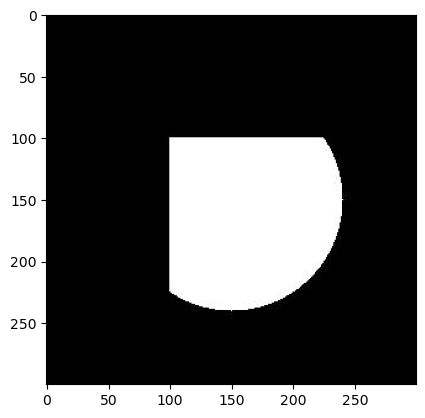

In [17]:
res = cv2.bitwise_and(img_cir, img_sq, mask = None)
plt.imshow(res,cmap='gray')

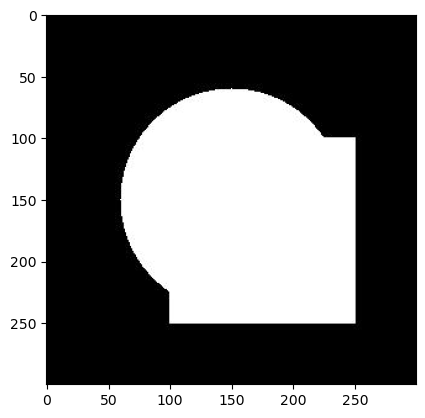

In [18]:
res = cv2.bitwise_or(img_cir, img_sq, mask = None)
plt.imshow(res,cmap='gray')

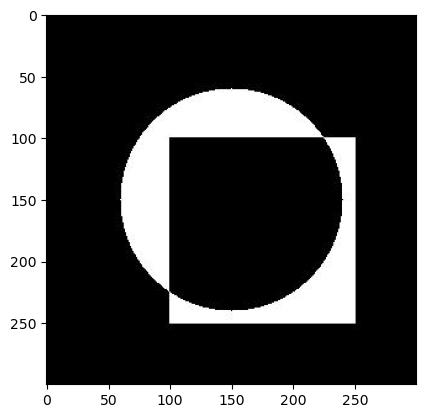

In [19]:
res = cv2.bitwise_xor(img_cir, img_sq, mask = None)
plt.imshow(res,cmap='gray')

(225, 225, 3)


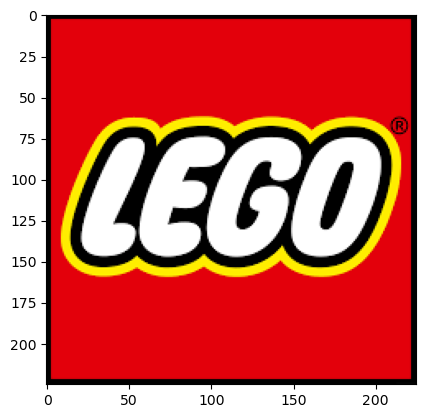

In [57]:
img_bgr = cv2.imread("lego.png", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(365, 225, 3)


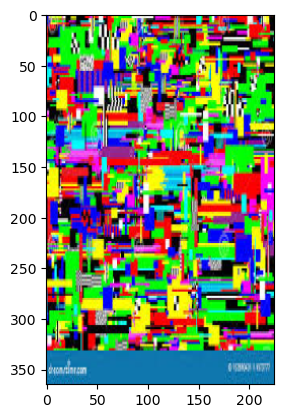

In [58]:
back = cv2.imread("pixel_error.jpeg", -1)
back_rgb = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)

aspect_ratio = logo_w / back_rgb.shape[0]

dim = (int(back_rgb.shape[0]*aspect_ratio), int(back_rgb.shape[1]*aspect_ratio))

back_rgb_resize = cv2.resize(back_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(back_rgb_resize)
print(back_rgb_resize.shape)

(225, 225)


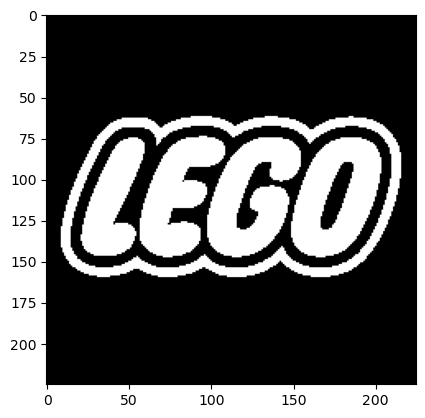

In [59]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

retval, img_gray_th = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_gray_th, cmap='gray')
print(img_gray_th.shape)

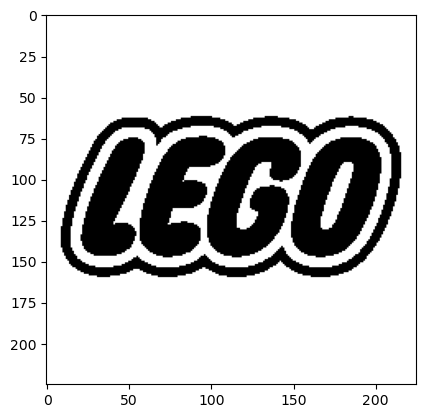

In [60]:
img_not = cv2.bitwise_not(img_gray_th)
plt.imshow(img_not, cmap='gray')

img_gray shape: (225, 225)
back_rgb_resize shape: (225, 225)
img_gray_th shape: (225, 225)


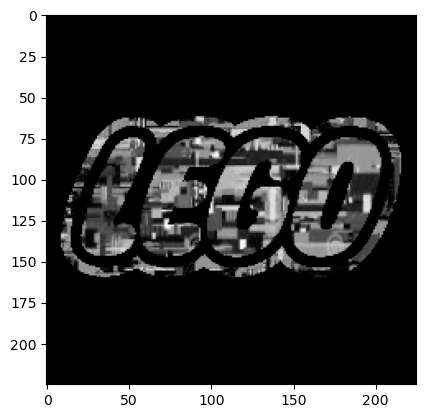

In [ ]:
print("img_gray shape:", img_gray.shape)
print("back_rgb_resize shape:", back_rgb_resize.shape)
print("img_gray_th shape:", img_gray_th.shape)

back_rgb_resize = cv2.resize(back_rgb_resize, (img_gray.shape[1], img_gray.shape[0]))
img_gray_th = cv2.resize(img_gray_th, (img_gray.shape[1], img_gray.shape[0]))

if len(back_rgb_resize.shape) == 3: 
    back_rgb_resize = cv2.cvtColor(back_rgb_resize, cv2.COLOR_BGR2GRAY)

back_rgb_resize = back_rgb_resize.astype(np.uint8)
img_gray = img_gray.astype(np.uint8)
img_gray_th = img_gray_th.astype(np.uint8)

img_back = cv2.bitwise_and(img_gray, back_rgb_resize, mask=img_gray_th)

plt.imshow(img_back, cmap='gray')
plt.show()

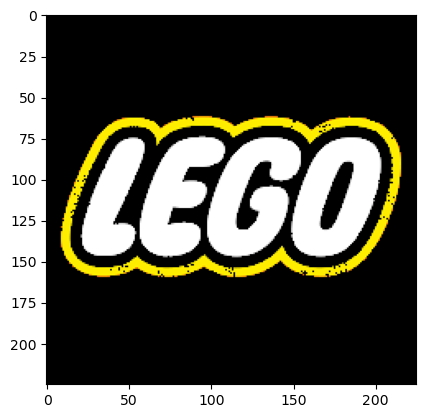

In [65]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask = img_back)
plt.imshow(img_foreground)